In [28]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib as plt
#import tensorflow as tf

In [60]:
# matplotlib
%matplotlib inline
import matplotlib
#matplotlib.rcParams.update({'font.size': 4})
matplotlib.rcParams["figure.dpi"] = 125

#set the font for matplotlib
from matplotlib import style
style.use('fivethirtyeight')

from matplotlib import figure
# Pandas and Numpy
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [30]:
#import connection string (youll need to create this)
from config import conn

# create the engine
engine = create_engine(conn)
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
us_data = Base.classes.us_data_df_v2
#us_data = Base.classes.us_data_df_v2_lag7
#us_data = Base.classes.us_data_df_v2_lag14
#us_data = Base.classes.us_data_df_v2_lag30
#us_data = Base.classes.us_data_df_v2_lag90
#us_data = Base.classes.us_data_df_v2_lag365
#Historical_Price = Base.classes.historical_price_by_day

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [32]:
#create df from Recession_Indicator table
results = []

results = session.query(us_data.intdate, \
                        us_data.ri, \
                        us_data.cpi, \
                        us_data.cpi_lag, \
                        us_data.gdp, \
                        us_data.gdp_lag, \
                        us_data.inf, \
                        us_data.inf_lag, \
                        us_data.unp, \
                        us_data.unp_lag, \
                        us_data.dji_open, \
                        us_data.dji_open_lag, \
                        us_data.dji_close, \
                        us_data.dji_close_lag, \
                        us_data.dji_opcl_diff, \
                        us_data.dji_opcl_lag, \
                        us_data.dji_high, \
                        us_data.dji_high_lag, \
                        us_data.dji_low, \
                        us_data.dji_low_lag, \
                        us_data.dji_hilo_diff, \
                        us_data.dji_hilo_lag
                        )


data_df = pd.DataFrame(results)
data_df.head()

,intdate,ri,cpi,cpi_lag,gdp,gdp_lag,inf,inf_lag,unp,unp_lag,...,dji_close,dji_close_lag,dji_opcl_diff,dji_opcl_lag,dji_high,dji_high_lag,dji_low,dji_low_lag,dji_hilo_diff,dji_hilo_lag
0,19701231,False,16.792044,NaN,NaN,NaN,5.838255,NaN,NaN,NaN,...,838.92000000,None,0E-8,None,838.92000000,None,838.92000000,None,0E-8,None
1,19710104,False,16.834236,16.792044,1135.156,NaN,4.292767,5.838255,5.994841,NaN,...,830.57000000,838.92000000,0E-8,0E-8,830.57000000,838.92000000,830.57000000,838.92000000,0E-8,0E-8
2,19710105,False,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,5.997475,5.994841,...,835.77000000,830.57000000,0E-8,0E-8,835.77000000,830.57000000,835.77000000,830.57000000,0E-8,0E-8
3,19710106,False,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.007436,5.997475,...,837.97000000,835.77000000,0E-8,0E-8,837.97000000,835.77000000,837.97000000,835.77000000,0E-8,0E-8
4,19710107,False,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.121167,6.007436,...,837.83000000,837.97000000,0E-8,0E-8,837.83000000,837.97000000,837.83000000,837.97000000,0E-8,0E-8


In [33]:
# CSV Import our input dataset
#data_df = pd.read_csv('us_data_df_v2.csv')
# Fill in the empty rows with "0". (4.5.2)
#data_df.fillna(0)
#data_df = data_df.dropna()
#data_df.head()

In [34]:
# convert to float
data_df[['dji_open','dji_open_lag', \
         'dji_close','dji_close_lag', \
         'dji_opcl_diff','dji_opcl_lag', \
         'dji_high','dji_high_lag', \
         'dji_low','dji_low_lag', \
         'dji_hilo_diff','dji_hilo_lag']] = data_df[['dji_open','dji_open_lag', \
                                                     'dji_close','dji_close_lag', \
                                                     'dji_opcl_diff','dji_opcl_lag', \
                                                     'dji_high','dji_high_lag', \
                                                     'dji_low','dji_low_lag', \
                                                     'dji_hilo_diff','dji_hilo_lag']].astype(float)

data_df = pd.get_dummies(data_df, columns=["ri"])
data_df.head(20)

,intdate,cpi,cpi_lag,gdp,gdp_lag,inf,inf_lag,unp,unp_lag,dji_open,...,dji_opcl_diff,dji_opcl_lag,dji_high,dji_high_lag,dji_low,dji_low_lag,dji_hilo_diff,dji_hilo_lag,ri_False,ri_True
0,19701231,16.792044,NaN,NaN,NaN,5.838255,NaN,NaN,NaN,838.92,...,0.0,NaN,838.92,NaN,838.92,NaN,0.0,NaN,1,0
1,19710104,16.834236,16.792044,1135.156,NaN,4.292767,5.838255,5.994841,NaN,830.57,...,0.0,0.0,830.57,838.92,830.57,838.92,0.0,0.0,1,0
2,19710105,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,5.997475,5.994841,835.77,...,0.0,0.0,835.77,830.57,835.77,830.57,0.0,0.0,1,0
3,19710106,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.007436,5.997475,837.97,...,0.0,0.0,837.97,835.77,837.97,835.77,0.0,0.0,1,0
4,19710107,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.121167,6.007436,837.83,...,0.0,0.0,837.83,837.97,837.83,837.97,0.0,0.0,1,0
5,19710108,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.194005,6.121167,837.01,...,0.0,0.0,837.01,837.83,837.01,837.83,0.0,0.0,1,0
6,19710111,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.095182,6.194005,837.21,...,0.0,0.0,837.21,837.01,837.21,837.01,0.0,0.0,1,0
7,19710112,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,5.978583,6.095182,844.19,...,0.0,0.0,844.19,837.21,844.19,837.21,0.0,0.0,1,0
8,19710113,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,NaN,5.978583,841.11,...,0.0,0.0,841.11,844.19,841.11,844.19,0.0,0.0,1,0
9,19710114,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,NaN,NaN,843.31,...,0.0,0.0,843.31,841.11,843.31,841.11,0.0,0.0,1,0


In [35]:
#data_df = data_df.dropna()
data_df = data_df.fillna(0)

In [36]:
data_df.head(20)

,intdate,cpi,cpi_lag,gdp,gdp_lag,inf,inf_lag,unp,unp_lag,dji_open,...,dji_opcl_diff,dji_opcl_lag,dji_high,dji_high_lag,dji_low,dji_low_lag,dji_hilo_diff,dji_hilo_lag,ri_False,ri_True
0,19701231,16.792044,0.000000,0.000,0.000,5.838255,0.000000,0.000000,0.000000,838.92,...,0.0,0.0,838.92,0.00,838.92,0.00,0.0,0.0,1,0
1,19710104,16.834236,16.792044,1135.156,0.000,4.292767,5.838255,5.994841,0.000000,830.57,...,0.0,0.0,830.57,838.92,830.57,838.92,0.0,0.0,1,0
2,19710105,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,5.997475,5.994841,835.77,...,0.0,0.0,835.77,830.57,835.77,830.57,0.0,0.0,1,0
3,19710106,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.007436,5.997475,837.97,...,0.0,0.0,837.97,835.77,837.97,835.77,0.0,0.0,1,0
4,19710107,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.121167,6.007436,837.83,...,0.0,0.0,837.83,837.97,837.83,837.97,0.0,0.0,1,0
5,19710108,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.194005,6.121167,837.01,...,0.0,0.0,837.01,837.83,837.01,837.83,0.0,0.0,1,0
6,19710111,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.095182,6.194005,837.21,...,0.0,0.0,837.21,837.01,837.21,837.01,0.0,0.0,1,0
7,19710112,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,5.978583,6.095182,844.19,...,0.0,0.0,844.19,837.21,844.19,837.21,0.0,0.0,1,0
8,19710113,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,0.000000,5.978583,841.11,...,0.0,0.0,841.11,844.19,841.11,844.19,0.0,0.0,1,0
9,19710114,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,0.000000,0.000000,843.31,...,0.0,0.0,843.31,841.11,843.31,841.11,0.0,0.0,1,0


In [37]:
# drop ri_False and rename ri_True ri
data_df = data_df.drop({"ri_False"}, axis=1).rename(columns={'ri_True':'ri'})

data_df.dtypes

intdate            int64
cpi              float64
cpi_lag          float64
gdp              float64
gdp_lag          float64
inf              float64
inf_lag          float64
unp              float64
unp_lag          float64
dji_open         float64
dji_open_lag     float64
dji_close        float64
dji_close_lag    float64
dji_opcl_diff    float64
dji_opcl_lag     float64
dji_high         float64
dji_high_lag     float64
dji_low          float64
dji_low_lag      float64
dji_hilo_diff    float64
dji_hilo_lag     float64
ri                 uint8
dtype: object

## Data Insights

In [38]:
# EDA on Data Table, showing 370 observations and 9 characteristics
data_df.shape

(12399, 22)

In [39]:
# EDA to see label of each column
data_df.columns.values 

array(['intdate', 'cpi', 'cpi_lag', 'gdp', 'gdp_lag', 'inf', 'inf_lag',
       'unp', 'unp_lag', 'dji_open', 'dji_open_lag', 'dji_close',
       'dji_close_lag', 'dji_opcl_diff', 'dji_opcl_lag', 'dji_high',
       'dji_high_lag', 'dji_low', 'dji_low_lag', 'dji_hilo_diff',
       'dji_hilo_lag', 'ri'], dtype=object)

In [40]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12399 entries, 0 to 12398
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   intdate        12399 non-null  int64  
 1   cpi            12399 non-null  float64
 2   cpi_lag        12399 non-null  float64
 3   gdp            12399 non-null  float64
 4   gdp_lag        12399 non-null  float64
 5   inf            12399 non-null  float64
 6   inf_lag        12399 non-null  float64
 7   unp            12399 non-null  float64
 8   unp_lag        12399 non-null  float64
 9   dji_open       12399 non-null  float64
 10  dji_open_lag   12399 non-null  float64
 11  dji_close      12399 non-null  float64
 12  dji_close_lag  12399 non-null  float64
 13  dji_opcl_diff  12399 non-null  float64
 14  dji_opcl_lag   12399 non-null  float64
 15  dji_high       12399 non-null  float64
 16  dji_high_lag   12399 non-null  float64
 17  dji_low        12399 non-null  float64
 18  dji_lo

- Data has only object values
- No variable column has null or missing values

## Summary Statistics

In [41]:
# EDA on Historical Price Table, beginning with basic statistics
data_df.describe()

,intdate,cpi,cpi_lag,gdp,gdp_lag,inf,inf_lag,unp,unp_lag,dji_open,...,dji_close_lag,dji_opcl_diff,dji_opcl_lag,dji_high,dji_high_lag,dji_low,dji_low_lag,dji_hilo_diff,dji_hilo_lag,ri
count,1.239900e+04,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,...,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000,12399.000000
mean,1.995123e+07,63.291900,63.283085,2991.331013,2991.331013,3.914089,3.914089,0.191612,0.191612,7335.375608,...,7334.457372,1.131071,1.119898,7392.158310,7390.102157,7276.952230,7274.961665,115.206080,115.140492,0.457053
std,1.418788e+05,27.419089,27.421867,5451.283110,5451.283110,2.930475,2.930475,1.114408,1.114408,6894.321945,...,6893.743701,85.183810,85.174872,6931.764989,6930.175944,6855.776187,6854.305427,124.727548,124.574185,0.498172
min,1.970123e+07,16.792044,0.000000,0.000000,0.000000,-0.355546,-0.355546,0.000000,0.000000,577.600000,...,0.000000,-1041.840000,-1041.840000,577.600000,0.000000,577.600000,0.000000,0.000000,0.000000,0.000000
25%,1.983041e+07,41.684774,41.684774,0.000000,0.000000,2.188027,2.188027,0.000000,0.000000,1116.765000,...,1116.665000,0.000000,0.000000,1127.035000,1126.910000,1106.465000,1106.125000,19.255000,19.250000,0.000000
50%,1.995071e+07,64.383567,64.383567,0.000000,0.000000,3.156842,3.156842,0.000000,0.000000,4614.780000,...,4610.560000,0.000000,0.000000,4646.130000,4639.790000,4578.510000,4571.810000,71.140000,71.120000,0.000000
75%,2.007110e+07,88.953113,88.953113,3578.848000,3578.848000,4.300535,4.300535,0.000000,0.000000,11014.780000,...,11018.915000,0.000000,0.000000,11153.605000,11153.185000,10897.000000,10896.040000,176.355000,176.320000,1.000000
max,2.020023e+07,109.295958,109.295958,21729.124000,21729.124000,13.549202,13.549202,11.006776,11.006776,29440.470000,...,29551.420000,1020.720000,1020.720000,29568.570000,29568.570000,29406.750000,29406.750000,1596.650000,1596.650000,1.000000


### Key Observations
- dataset comprises of 64,708 observations and 4 chracteriestics
- out of which x is dependent variable and the remaining x are independent variables
- Data needs to be redone.  Not capturing mean, Standard deviation etc

In [42]:
# EDA on Historical Price Table continued with pandas-profiling
#
#   UNCOMMENT FOR FINAL 
#
#pp.ProfileReport(data_df)

## EDA Data Visualizations


In [43]:
#copy data_df into X and drop recession indicator
X = data_df.copy()
X = X.drop("ri", axis=1)

X.head()

,intdate,cpi,cpi_lag,gdp,gdp_lag,inf,inf_lag,unp,unp_lag,dji_open,...,dji_close,dji_close_lag,dji_opcl_diff,dji_opcl_lag,dji_high,dji_high_lag,dji_low,dji_low_lag,dji_hilo_diff,dji_hilo_lag
0,19701231,16.792044,0.000000,0.000,0.000,5.838255,0.000000,0.000000,0.000000,838.92,...,838.92,0.00,0.0,0.0,838.92,0.00,838.92,0.00,0.0,0.0
1,19710104,16.834236,16.792044,1135.156,0.000,4.292767,5.838255,5.994841,0.000000,830.57,...,830.57,838.92,0.0,0.0,830.57,838.92,830.57,838.92,0.0,0.0
2,19710105,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,5.997475,5.994841,835.77,...,835.77,830.57,0.0,0.0,835.77,830.57,835.77,830.57,0.0,0.0
3,19710106,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.007436,5.997475,837.97,...,837.97,835.77,0.0,0.0,837.97,835.77,837.97,835.77,0.0,0.0
4,19710107,16.834236,16.834236,1135.156,1135.156,4.292767,4.292767,6.121167,6.007436,837.83,...,837.83,837.97,0.0,0.0,837.83,837.97,837.83,837.97,0.0,0.0


In [44]:
#copy recesison indicator and convert to data frame
y_cols = data_df["ri"] 

y = pd.DataFrame()

y["ri"] = y_cols
y.head()

,ri
0,0
1,0
2,0
3,0
4,0


In [45]:
y['ri'].value_counts()

0    6732
1    5667
Name: ri, dtype: int64

In [46]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cols, random_state=1)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs", max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")



 Logistic regression model accuracy: 0.542


In [48]:

from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1681,0
Actual 1,1419,0


In [49]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1681
           1       0.00      0.00      0.00      1419

    accuracy                           0.54      3100
   macro avg       0.27      0.50      0.35      3100
weighted avg       0.29      0.54      0.38      3100



/Users/rfcelorio/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:


# Create a random forest classifier. (17.8.3)
rf_model = RandomForestClassifier(n_estimators=128, random_state=78, max_depth=4) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [52]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1483,198
Actual 1,433,986


In [53]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1483,198
Actual 1,433,986


Accuracy Score : 0.7964516129032259
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1681
           1       0.83      0.69      0.76      1419

    accuracy                           0.80      3100
   macro avg       0.80      0.79      0.79      3100
weighted avg       0.80      0.80      0.79      3100



In [54]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.21645828035369374, 'inf_lag'),
 (0.20157279844674483, 'inf'),
 (0.12371589642223006, 'intdate'),
 (0.11047021160863221, 'cpi'),
 (0.0738462203766991, 'cpi_lag'),
 (0.040742694124575395, 'dji_high'),
 (0.033944064430466395, 'dji_high_lag'),
 (0.03155686851327416, 'dji_hilo_diff'),
 (0.030827934959623274, 'dji_hilo_lag'),
 (0.027876894078575652, 'dji_close_lag'),
 (0.026697459709010884, 'dji_open_lag'),
 (0.026008505849236786, 'dji_open'),
 (0.018533033173224585, 'dji_low_lag'),
 (0.017797983763203275, 'dji_close'),
 (0.013651927722496623, 'dji_low'),
 (0.0025960154723188677, 'gdp'),
 (0.0013854387256709952, 'dji_opcl_lag'),
 (0.001164724960410885, 'dji_opcl_diff'),
 (0.0009853602713666939, 'gdp_lag'),
 (0.00010694751374799172, 'unp'),
 (6.073952479770996e-05, 'unp_lag')]

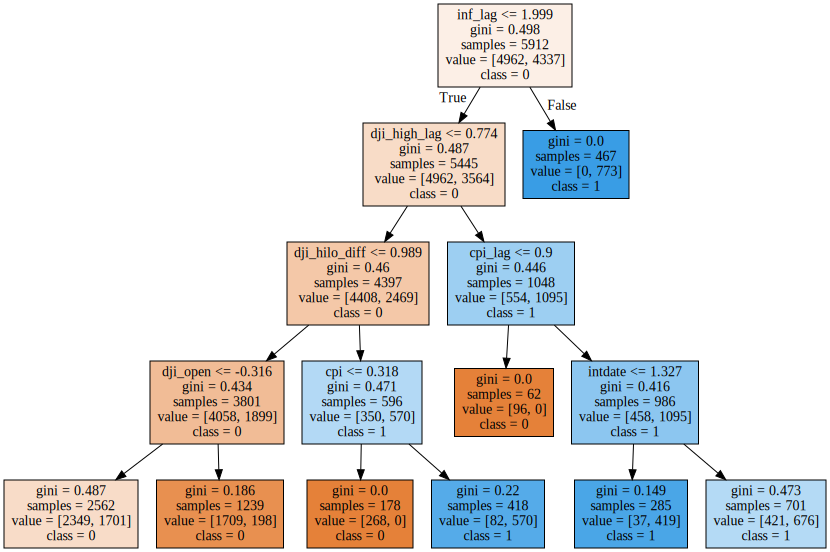

In [55]:
import graphviz
from sklearn import tree
#for tree_in_forest in rf_model.estimators_:
classification_tree = tree.export_graphviz(rf_model.estimators_[0], out_file=None, 
                      feature_names=X.columns,  
                      class_names=["0","1"],  
                      filled=True)
graph = graphviz.Source(classification_tree) 
graph

## Check for missing values

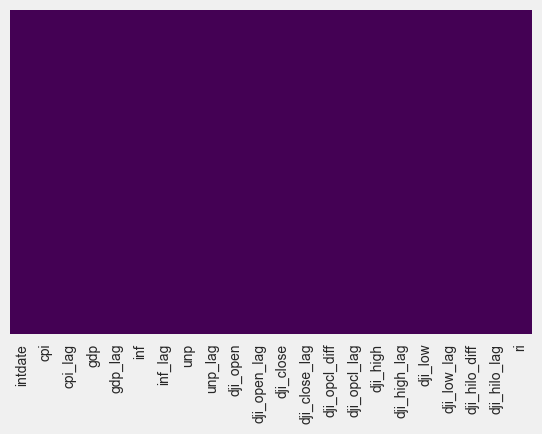

In [56]:
import seaborn as sns
sns.heatmap(data_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## Checking Correlation

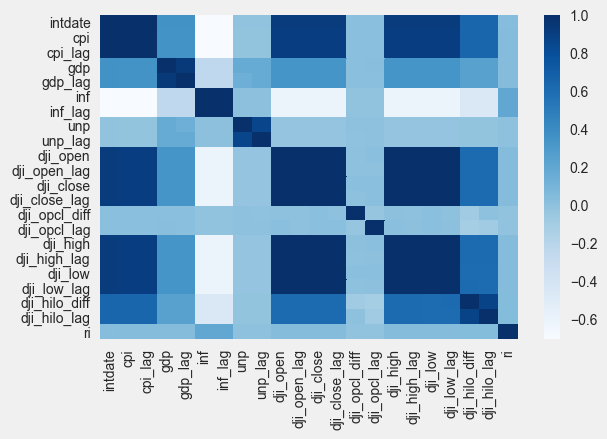

In [57]:
#plt.figure(figsize=(10,10))
figure.Figure(figsize=(10,10))
sns.heatmap(data_df.corr(),cmap='Blues',annot=False)

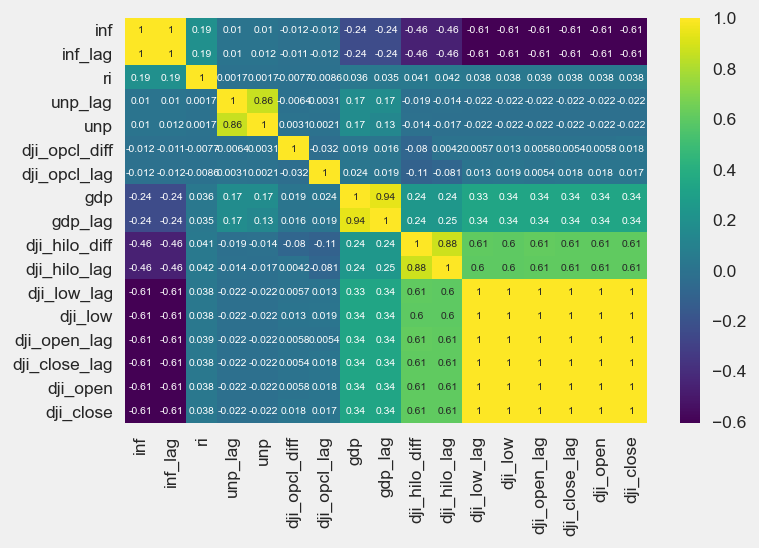

In [62]:
#Quality correlation matrix

matplotlib.rcParams.update({'font.size': 6})

k = 17# number of variables for heatmap
cols = data_df.corr().nlargest(k, 'inf')['inf'].index
cm = data_df[cols].corr()
#plt.figure(figsize=(10,10))
figure.Figure(figsize=(10,100))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Checking for outliers

In [ ]:
import matplotlib.pyplot as plt

l = data_df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,.75
                    *number_of_rows))
for i in range(0,len(l)):
    plt.plot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_df[l[i]],color='red',orient='h')
    plt.tight_layout()

## Checking skewness

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data_df[l[i]],kde=True) 